# Modelado del problema térmico en 1D

## Ecuación de calor en una barra 

En este tutorial calcularemos la **temperatura** $T$ en [K] de una barra de longitud $L$ en [m]. Pensemos también que tiene una **fuente** de calor $f$ por unidad de longitud (en [J/sm] es decir [W/m]), esto se puede pensar como una corriente eléctrica circulando en la barra que la calienta por [efecto Joule](https://en.wikipedia.org/wiki/Joule_heating). También tendremos la **tasa de flujo de calor** $q$ medido en [J/sm$^{2}$] (la energía que fluye por unidad de tiempo por unidad de área, es decir, en [W/m$^{2}$]). A continuación un esquema.

[<img src="barra_termica.png" width="400"/>](barra_termica.png)

Como sabemos de la ([primera ley de la termodinámica](https://es.wikipedia.org/wiki/Primer_principio_de_la_termodin%C3%A1mica)), la tasa de incremento de energía interna en un sistema es igual al calor neto y al trabajo transferido al mismo (aquí solo tenemos calor que entra y sale por los bordes):

$$\underbrace{A\left(L\right)q\left(L\right)}_{\text{Energía que entra}} -\underbrace{A\left(0\right)q\left(0\right)}_{\text{Energía que sale}}=\underbrace{\int_{0}^{L} \ f \ dx.}_{\text{Energía generada}}\tag{1}$$

Si sólamente existe flujo de calor por conducción ([ley de Fourier](https://es.wikipedia.org/wiki/Conducci%C3%B3n_de_calor)), entonces vale:

$$ q = - k T^{'}\tag{2}$$

donde $k$ es la conductividad térmica en [W/Km$^{2}$]. Esto vale sólo para estado estacionario. Si tomamos el resultado del teorema fundamental del cálculo podemos calcular el lado izquierdo de la Ec. (1):

$$A\left(L\right)q\left(L\right) -A\left(0\right)q\left(0\right)=\int_{0}^{L} \ \left(A\left(x\right)q\left(x\right)\right)^{'} \ dx.\tag{3}$$

Si se reemplaza la Ec. (2) en Ec. (3) y se combina con la Ec. (1) se llega a:

$$  \int_{0}^{L} \ \left(A \left(-kT^{'}\right)\right)^{'} \ dx= \int_{0}^{L} \ f \ dx \tag{4}.$$

Si $L$ se hace tender a cero, entonces se llega a: 

$$\left(A \left(-kT^{'}\right)\right)^{'} = f \tag{5}$$

es un resultado similar a lo que hemos hecho hasta ahora, si consideramos una sección de barra constante y conductividad térmica constante entonces:

$$-AkT^{''}=f\tag{6}$$

esta es la ecuación de Poisson que ya vimos en el tutorial de [Elementos Finitos en 1D](https://nbviewer.jupyter.org/github/rirastorza/Intro2FEM/blob/master/Elementos_finitos_en_1D/fem1D.ipynb). Se resuelve de la misma forma.

## Condiciones de frontera

En esta sección veremos el significado térmico de los diferentes tipos de condiciones de frontera (o borde, o contorno):

- [Dirichlet](https://en.wikipedia.org/wiki/Dirichlet_boundary_condition)
- [Neumann](https://es.wikipedia.org/wiki/Condici%C3%B3n_de_frontera_de_Neumann)
- [Robin](https://es.wikipedia.org/wiki/Condici%C3%B3n_de_frontera_de_Robin)

### Condición de Dirichlet

En esta condición se pide que la frontera tenga una temperatura conocida, puede ser constante o variable, pero debe ser conocida su función. Nosotros nuevamente tomaremos la primer opción, es decir, que si $x_{0}$ es la frontera entonces:

$$T\left(x_{0}\right) = T_{0} $$

donde $T_{0}$ es una constante conocida.

### Condición de Neumann

Para imponer una condición de flujo de calor constante, tomaremos una condición de Neumann, que se define como:

$$ \underbrace{-kT^{'}\left(x_{0}\right)}_{q\left( x_{0}\right)} = \ \text{constante}.$$

Por ejemplo, si tenemos un extremo de la barra aislado térmicamente, entonces no entrará calor. Por lo tanto:

$$ T^{'}\left(x_{0}\right) = 0.$$

### Condición de Robin

Esta condición es una mezcla de las dos anteriores. Utilizaremos la expresión:

$$Ak T^{'}\left(x_{0}\right) = h \left(T\left(x_{0}\right)-T_{\infty}\right)+q_{\infty}$$

Noten que aquí necesitamos tres constantes: a $h$ se lo llama coeficiente de transferencia térmica, $T_{\infty}$ es una temperatura fija (ver ejemplo de abajo), y $q_{\infty}$ una fuente de calor constante. Si $q_{\infty}=0$ se la denomina una condición de borde convectiva.


## Ejemplo aplicando condición de Robin 

En esta sección desarrollaremos el ejemplo 3.1 (resuelto) del [libro de Kreith y otros](https://books.google.com.ar/books/about/Principles_of_Heat_Transfer.html?id=1hVSQBNvr74C&redir_esc=y). Es un intercambiador de calor, un chapón de acero grande de ancho 10 cm y espesor 1 cm (la otra dimensión se considera infinito). Se pueden considerar los efectos de borde también despreciables (10 cm es diez veces más grande que 1 cm). El chapón está sumergido en un aceite que funciona como medio de transferencia de calor que se encuentra a 80 °C y está conectado a una fuente de corriente que genera una densidad de potencia de 1$\times 10^{6}$ W/m$^{3}$. Se quiere evaluar la temperatura dentro del chapón en estado estacionario. El coeficiente de transferencia de calor (convección chapón-aceite) es $h= 42$ W/m$^{3}K$. La conductividad térmica del acero a 200 °C es aproximadamente 64 W/mK. En la figura siguiente se muestra un esquemático.

[<img src="ejemplo_termica.png" width="800"/>](ejemplo_termica.png)

Con la aproximación mostrada en la figura (b) podemos pensar el problema como un sistema unidimensional con condiciones de borde convectivas del tipo Robin (con $q_{\infty}=0$). Note que podríamos utilizar la misma ecuación que usamos en el [tutorial de condiciones de contorno de Robin](https://github.com/rirastorza/Intro2FEM/blob/master/Elementos_finitos_en_1D/fem1D_Robin.ipynb), la repetimos aquí, con las variables de nuestro problema:

$$ \left \{ \begin{array}{l} -\left(kT^{'}\right)^{'}=\frac{f}{A} \ \ \text{ para } \ \ x\in I=\left(0,L \right) \\   kT^{'}(0)=h\left(T(0)-T_{\infty}\right)  \ \ \text{condición de borde Robin} \\  -kT^{'}(L)=h\left(T(L)-T_{\infty}\right)  \ \ \text{condición de borde Robin} \end{array} \right .$$

Hemos considerado la fuente de calor $f$ en lugar de por unidad de longitud por unidad de volumen porque ese es el dato que tenemos (en W/m$^3$), por eso ponemos $\frac{f}{A}$.

La formulación variacional en este caso será:

$$k\left [\int_{0}^{L}v^{'}T^{'}dx + T^{'}(0)v(0) - T^{'}(L)v(L)\right ] = \int_{0}^{L} \frac{f}{A}vdx \tag{7}$$

Reemplazamos las condiciones de contorno:

$$\int_{0}^{L}v^{'}kT^{'}dx + h\left(T(0)-T_{\infty}\right)v(0) +h\left(T(L)-T_{\infty}\right)v(L) = \int_{0}^{L} \frac{f}{A}vdx$$

Operamos un poco más y podemos encontrar la forma bilineal y lineal:

$$\int_{0}^{L}v^{'}kT^{'}dx + hT(0)v(0) +hT(L)v(L) = \int_{0}^{L} \frac{f}{A}vdx + h
T_{\infty}v(0) +hT_{\infty}v(L)\tag{8},$$

todo lo que está a izquierda depende de $T$ y de $v$ y lo que está a derecha depende sólo de $v$. Recordando cómo escribimos esto de una forma más general.

$$\int_{0}^{L}v^{'}kT^{'}dx + \int_{\Gamma_{R_{0}}}hT \ v \ ds +\int_{\Gamma_{R_{L}}}hT \ v \ ds = \int_{0}^{L} \frac{f}{A}vdx +\int_{\Gamma_{R_{0}}}h
T_{\infty} \ v \ ds  +\int_{\Gamma_{R_{L}}}hT_{\infty} \ v \ ds\tag{9}.$$

Con lo visto hasta ahora podemos resolver el problema en FEniCS. Se comienza importando las librerías y definiendo los parámetros.

In [1]:
from __future__ import print_function
from fenics import *
# Defino la malla
nx = 10 #numero de intervalos
l0 = 0.01 #Longitud 1 cm
A = 0.01*0.1 #sección 1cmx10cm
k = 64.0 # conductividad térmica del acero en [W/mK]
qg = 1.0e6 #En [W/m] 
h = 42.0 #coeficiente de convección en [W/m2K]
Tinf = 353.15 #temperatura en en kelvin

Luego, la malla:

In [2]:
minx, maxx= 0.0, l0 
mesh = IntervalMesh(nx, minx, maxx)#malla en 1D 
V0 = FunctionSpace(mesh, 'CG',1)#Continuous Lagrange elements

En el código siguiente se definen las clases que nos indican dónde se aplicarán las condiciones de borde (borde de arriba y abajo). 

In [3]:
class borde_Ar(SubDomain):
    def inside(self, x, on_boundary):
        tol = 1E-14
        return on_boundary and near(x[0], 0.0, tol)

class borde_Ab(SubDomain):
    def inside(self, x, on_boundary):
        tol = 1E-14
        l0 = 0.01
        return on_boundary and near(x[0], l0, tol)

Luego, los debo marcar para poder asignar las condiciones a cada uno por separado. Le pusimos el marcador 20 al borde de arriba y 30 al de abajo.

In [4]:
marcador_borde = MeshFunction("size_t", mesh, mesh.topology().dim()-1, 0)
bc_ab = borde_Ab()
bc_ar = borde_Ar()
bc_ab.mark(marcador_borde, 20)
bc_ar.mark(marcador_borde, 30)
ds = Measure('ds', domain=mesh, subdomain_data=marcador_borde)

Ahora escribimos la Ec. (9) para definir la formulación variacional.

In [5]:
T = TrialFunction(V0)
v = TestFunction(V0)
f = Constant(qg)

a = k*dot(grad(T), grad(v))*dx+h*T*v*ds(20)+h*T*v*ds(30)
L = f*v*dx+h*Tinf*v*ds(20)+h*Tinf*v*ds(30)

Resolvemos y graficamos.

Cantidad de celdas: 10
Cantidad de vertices: 11


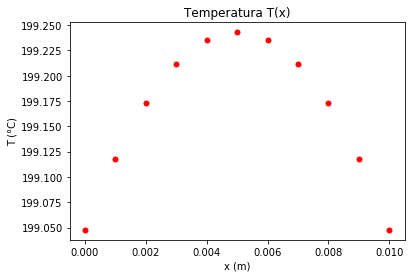

In [8]:
T = Function(V0)
solve(a == L, T)
import matplotlib.pyplot as plt
Th = T.compute_vertex_values(mesh) 
print('Cantidad de celdas:',nx)
print('Cantidad de vertices:',len(Th))
fig, axs = plt.subplots(1,1)
import numpy as np
xu = np.linspace(0.0, 0.01, len(Th),endpoint = True)
axs.plot(xu,Th-273.15,'ro',markersize=5)
axs.set_xlabel('x (m)')
axs.set_ylabel('T (°C)')
plt.title('Temperatura T(x)')
plt.show()